In [18]:
import pandas
import numpy as np

In [19]:
ODAQ_results = pandas.read_csv('./ODAQ/ODAQ_listening_test/ODAQ_results.csv')
ODAQ_results_BSU1 = pandas.read_csv('./ODAQ_v1_BSU/Cohort_B1_results.csv')
ODAQ_results_BSU2 = pandas.read_csv('./ODAQ_v1_BSU/Cohort_B2_results.csv')

In [20]:
ODAQ_results

,score,method,condition,process,item,subject
0,47.0,LP,LP3.5,LP35,LP_11_guitar,Subject 1: USLA08
1,5.0,LP,LP3.5,LP35,LP_11_guitar,Subject 2: DEID44
2,10.0,LP,LP3.5,LP35,LP_11_guitar,Subject 3: DEID1115
3,20.0,LP,LP3.5,LP35,LP_11_guitar,Subject 4: DEID337
4,30.0,LP,LP3.5,LP35,LP_11_guitar,Subject 5: USLA06
...,...,...,...,...,...,...
6235,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 22: DEID2
6236,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 23: USLA01
6237,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 24: USLA05
6238,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 25: DEID1


In [21]:
methods = ODAQ_results['method'].unique()
conditions = ODAQ_results['condition'].unique()
processes = ODAQ_results['process'].unique()
items = ODAQ_results['item'].unique()

print(methods)
print(conditions)
print(processes)
print(items)

['LP' 'TM' 'UN' 'SH' 'PE' 'DE']
['LP3.5' 'LP7' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Ref']
['LP35' 'LP70' 'LP50' 'LP90' 'LP105' 'LP120' 'LP150' 'reference' 'TM3k'
 'TM5k' 'TM7k' 'TM9k' 'TM10.5k' 'UN3k' 'UN5k' 'UN7k' 'UN9k' 'UN10.5k'
 'SH70_MS' 'SH50_MS' 'SH30_MS' 'SH20_MS' 'SH10_MS' 'PE_4096_MS_NMR10'
 'PE_2048_MS_NMR10' 'PE_1024_MS_NMR10' 'PE_2048_MS_NMR16'
 'PE_1024_MS_NMR16' 'OpenUnmix_mid' 'TFC_TDF_U_Net_mid' 'Cocktail_mid'
 'DeepFilterNet2_mid' 'PSM_quantize_mask']
['LP_11_guitar' 'LP_23_jazz' 'LP_AmateurOnPurpose'
 'LP_CreatureFromTheBlackjackTable' 'TM_01b_trumpet' 'TM_02_violin'
 'TM_AmateurOnPurpose' 'TM_CreatureFromTheBlackjackTable'
 'UN_20c_accordion' 'UN_21_violin' 'UN_AmateurOnPurpose'
 'UN_CreatureFromTheBlackjackTable' 'SH_04_choral' 'SH_13_glockenspiel'
 'SH_AmateurOnPurpose' 'SH_CreatureFromTheBlackjackTable'
 'PE_27_castanets' 'PE_39_clapping' 'PE_AmateurOnPurpose'
 'PE_CreatureFromTheBlackjackTable' 'DE_CosmosLandromat_remix1_LD6'
 'DE_CosmosLandromat_remix3_LD3' 'DE_ElephantsD

In [22]:
# Get unique subjects from ODAQ_results
unique_subjects = ODAQ_results['subject'].unique()

print(unique_subjects)

# Dynamically create expert variables
for i, subject in enumerate(unique_subjects, start=1):
    globals()[f"expert{i}"] = ODAQ_results[ODAQ_results['subject'] == subject]


['Subject 1: USLA08' 'Subject 2: DEID44' 'Subject 3: DEID1115'
 'Subject 4: DEID337' 'Subject 5: USLA06' 'Subject 6: DEID5'
 'Subject 7: DEID9' 'Subject 8: DEID4' 'Subject 9: USLG04'
 'Subject 10: USLA04' 'Subject 11: USLA07' 'Subject 12: DEID256'
 'Subject 13: DEID6' 'Subject 14: USLG05' 'Subject 15: USLA09'
 'Subject 16: USLG02' 'Subject 17: USLG03' 'Subject 18: DEID7'
 'Subject 19: USLA12' 'Subject 20: DEID10' 'Subject 21: DEID8'
 'Subject 22: DEID2' 'Subject 23: USLA01' 'Subject 24: USLA05'
 'Subject 25: DEID1' 'Subject 26: DEID3']


In [23]:
# Initialize score lists dynamically for 26 experts
for i in range(1, 27):  # Assuming 26 experts
    globals()[f"expert{i}_scores"] = []

# Append scores systematically
for item in items:
    for i in range(1, 27):
        expert_df = globals()[f"expert{i}"]  # Access expert data frame
        scores = expert_df[expert_df['item'] == item]['score'].values
        globals()[f"expert{i}_scores"].append(scores)

In [24]:
# Function to compute rankings with penalty for ties
def competition_ranking(scores):
    """Returns competition-style rankings (ascending order), where ties get the same rank, and the next rank is skipped accordingly."""
    
    sorted_indices = np.argsort(scores)  # Sort in ascending order
    ranks = np.zeros_like(scores, dtype=int)
    
    rank = 1  # Start ranking from 1
    for i in range(len(scores)):
        if i > 0 and scores[sorted_indices[i]] == scores[sorted_indices[i - 1]]:
            ranks[sorted_indices[i]] = ranks[sorted_indices[i - 1]]  # Assign the same rank for ties
        else:
            ranks[sorted_indices[i]] = rank  # Assign new rank
        
        rank += 1  # Increment rank, ensuring skipped positions for ties
    
    return ranks


In [25]:
# Compute rankings systematically for 26 experts
for i in range(1, 27):  # Assuming 26 experts
    expert_scores = globals()[f"expert{i}_scores"]  # Get the score list
    globals()[f"expert{i}_rankings"] = np.array([competition_ranking(row) for row in expert_scores])

In [26]:
# Perfect ranking
perfect_ranking = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [27]:
# Define a distance function (Euclidean distance)
def compute_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)  # Euclidean distance

For $\mathbf{v}_1 = [v_{1,1}, v_{1,2}, \ldots, v_{1,n}]$ and $\mathbf{v}_2 = [v_{2,1}, v_{2,2}, \ldots, v_{2,n}]$, with $n=8$, we compute the euclidean distance between them as follows:
$$d(\mathbf{v}_1, \mathbf{v}_2) = \sqrt{\sum_{i=1}^{n} (v_{1,i} - v_{2,i})^2}$$

In [28]:
# Initialize a 26x30 matrix to store distances
distance_matrix = np.zeros((26, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

distance_matrix_df = pandas.DataFrame(distance_matrix, columns=items)

In [29]:
distance_matrix_df

,LP_11_guitar,LP_23_jazz,LP_AmateurOnPurpose,LP_CreatureFromTheBlackjackTable,TM_01b_trumpet,TM_02_violin,TM_AmateurOnPurpose,TM_CreatureFromTheBlackjackTable,UN_20c_accordion,UN_21_violin,...,DE_CosmosLandromat_remix1_LD6,DE_CosmosLandromat_remix3_LD3,DE_ElephantsDream_LD0,DE_female_speech_music_1_LD0,DE_female_speech_music_2_LD9,DE_female_speech_music_3_LD3,DE_Meridian_remix1_LD3,DE_Meridian_remix2_LD6,DE_SitaSings_remix1_LD0,DE_SitaSings_remix2_LD6
0,2.828427,4.472136,2.645751,3.316625,2.000000,2.449490,2.000000,3.464102,5.000000,4.123106,...,2.828427,3.162278,5.099020,5.567764,3.000000,2.000000,4.898979,5.477226,1.414214,3.741657
1,2.645751,1.414214,1.414214,1.414214,0.000000,2.000000,0.000000,1.000000,2.449490,2.236068,...,2.236068,1.000000,1.414214,8.246211,1.414214,3.872983,2.828427,5.477226,3.464102,2.449490
2,3.162278,2.449490,2.000000,2.449490,2.645751,2.828427,1.732051,2.000000,3.464102,3.741657,...,5.196152,2.449490,1.000000,3.741657,3.316625,4.690416,5.196152,2.449490,3.872983,1.732051
3,3.162278,1.732051,4.000000,3.000000,2.645751,3.741657,3.464102,3.741657,3.162278,5.477226,...,4.690416,2.449490,4.000000,3.741657,4.242641,4.242641,4.000000,1.414214,4.242641,3.162278
4,3.316625,2.645751,1.000000,3.872983,3.000000,6.244998,4.123106,4.123106,3.464102,7.615773,...,5.567764,4.582576,4.795832,4.582576,2.828427,7.874008,3.316625,3.162278,5.916080,2.828427
5,1.732051,1.732051,2.645751,3.000000,5.291503,4.795832,3.316625,2.645751,4.000000,0.000000,...,1.414214,2.000000,3.162278,3.464102,2.449490,5.477226,2.828427,2.449490,2.828427,5.099020
6,1.414214,2.000000,2.000000,2.828427,2.449490,4.358899,3.162278,4.690416,4.000000,4.690416,...,6.164414,4.000000,4.000000,5.656854,2.449490,4.000000,6.164414,3.464102,5.916080,4.358899
7,1.414214,1.414214,2.828427,1.414214,2.828427,5.291503,4.690416,1.414214,4.000000,4.690416,...,8.000000,7.483315,2.449490,7.211103,0.000000,5.477226,4.242641,0.000000,5.477226,5.477226
8,4.898979,2.828427,1.414214,3.316625,2.236068,5.656854,2.449490,3.000000,6.000000,5.477226,...,4.690416,3.741657,1.414214,5.656854,2.449490,3.162278,3.464102,6.928203,2.449490,4.000000
9,1.732051,3.872983,1.414214,1.732051,0.000000,0.000000,1.414214,1.414214,2.449490,2.449490,...,1.414214,3.162278,0.000000,1.414214,1.414214,0.000000,3.162278,3.000000,1.414214,2.828427


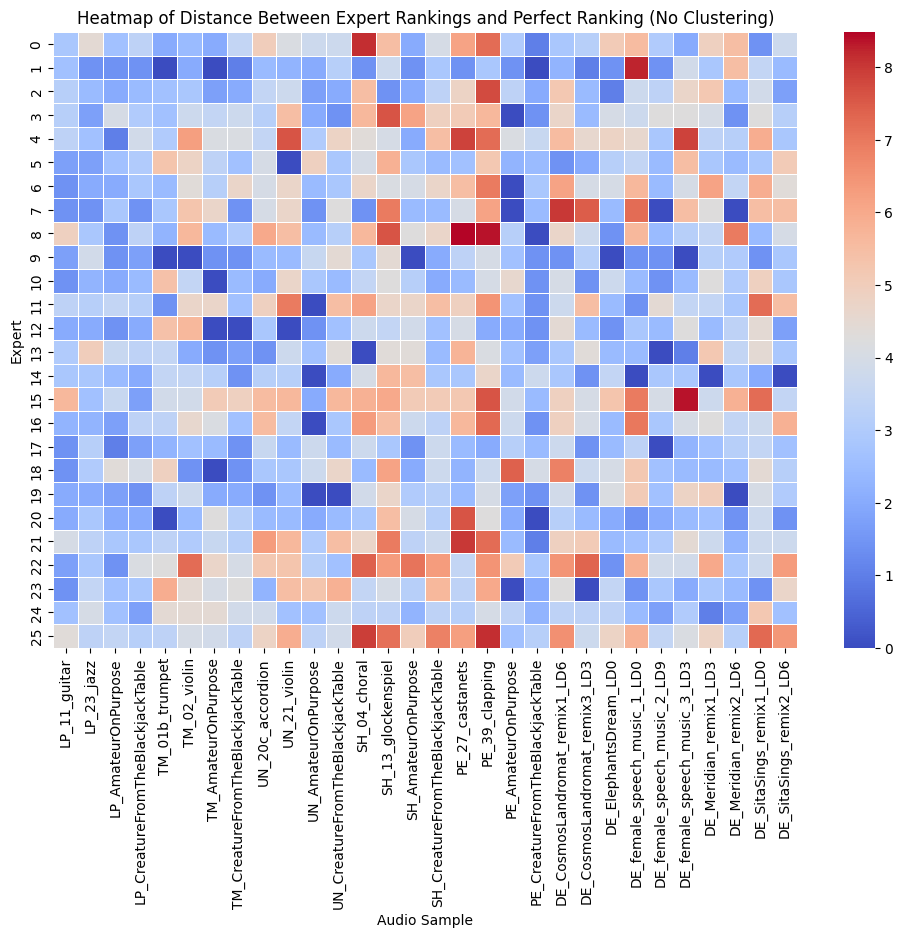

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix_df, cmap="coolwarm", annot=False, linewidths=0.5)

# Labels and title
plt.xlabel("Audio Sample")
plt.ylabel("Expert")
plt.title("Heatmap of Distance Between Expert Rankings and Perfect Ranking (No Clustering)")

# Show the plot
plt.show()


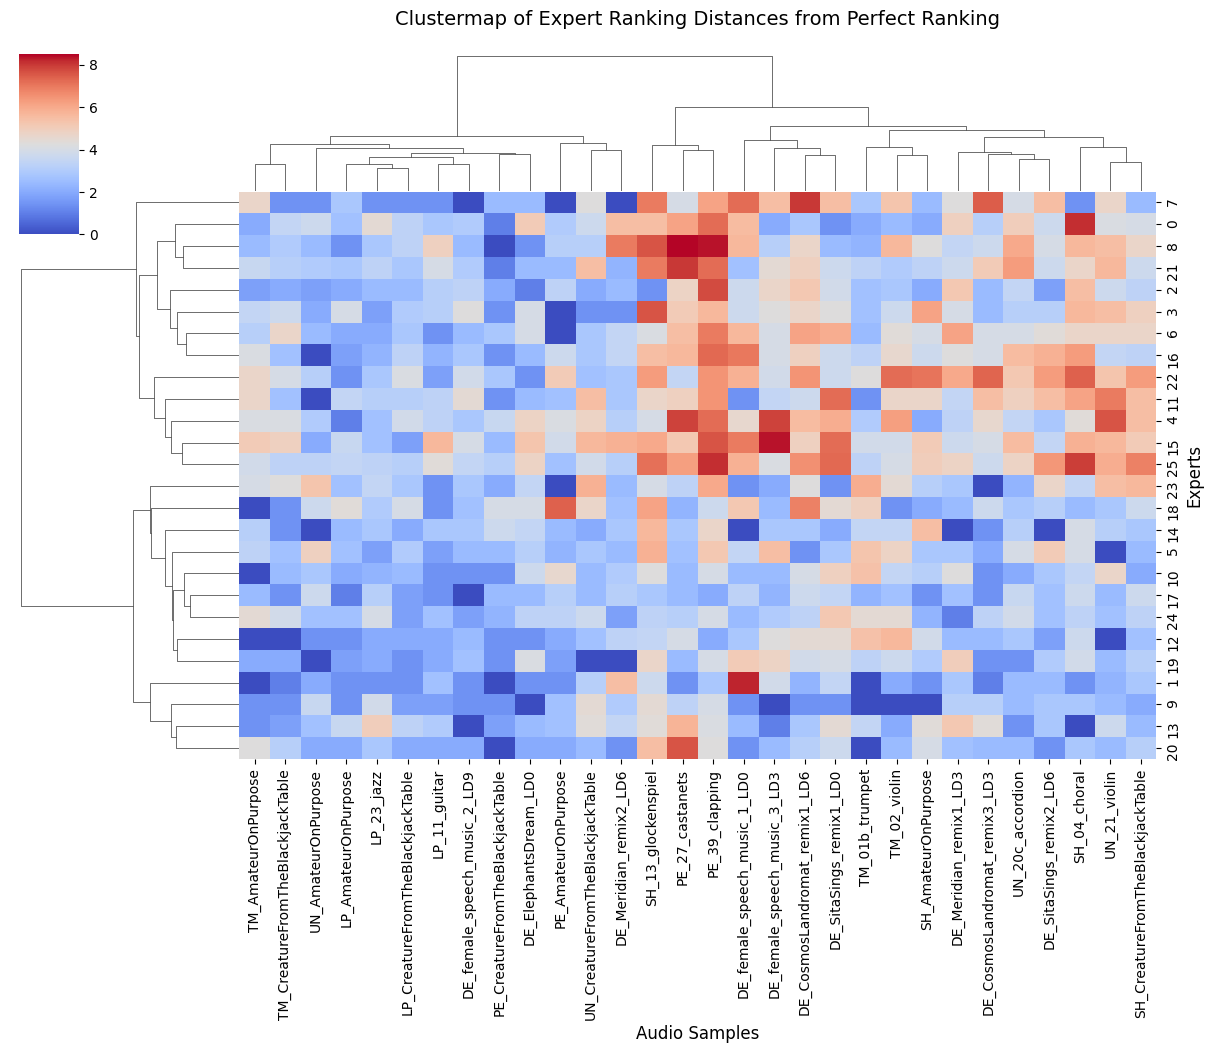

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering (using Ward's method)
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap = sns.clustermap(
    distance_matrix_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 10),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap.ax_heatmap.set_ylabel("Experts", fontsize=12)
clustermap.ax_heatmap.set_title("Clustermap of Expert Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Show the plot
plt.show()

In [32]:
# PERFORMANCE-BASED CLUSTERING

from scipy.cluster.hierarchy import fcluster

# Extract clusters from the linkage matrix
num_clusters = 4  # Choose the number of clusters (you can adjust)
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame mapping experts to their cluster
cluster_df = pd.DataFrame({'Expert': [f"Expert {i}" for i in range(1, 27)], 
                           'Cluster': cluster_labels})

cluster_df

,Expert,Cluster
0,Expert 1,1
1,Expert 2,4
2,Expert 3,1
3,Expert 4,1
4,Expert 5,1
5,Expert 6,3
6,Expert 7,1
7,Expert 8,2
8,Expert 9,1
9,Expert 10,4


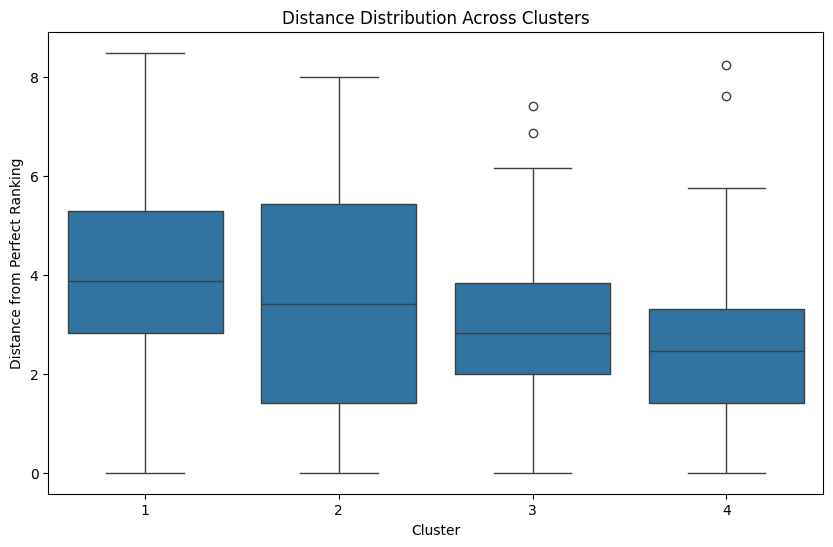

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to the distance matrix
distance_matrix_df['Cluster'] = cluster_labels

# Melt data for visualization
melted_df = distance_matrix_df.melt(id_vars=['Cluster'], var_name='Ranking Vector', value_name='Distance')

# Plot the distribution of distances per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Distance', data=melted_df)
plt.xlabel("Cluster")
plt.ylabel("Distance from Perfect Ranking")
plt.title("Distance Distribution Across Clusters")
plt.show()


In [34]:
# Example: Find which experts belong to Cluster 1
cluster_1_experts = cluster_df[cluster_df['Cluster'] == 1]
print(cluster_1_experts)


       Expert  Cluster
0    Expert 1        1
2    Expert 3        1
3    Expert 4        1
4    Expert 5        1
6    Expert 7        1
8    Expert 9        1
11  Expert 12        1
15  Expert 16        1
16  Expert 17        1
21  Expert 22        1
22  Expert 23        1
25  Expert 26        1


In [35]:
expert1_scores

[array([ 47.,  66.,  56.,  76.,  90., 100.,  91.,  94.]),
 array([ 17.,  50.,  35.,  46., 100., 100., 100., 100.]),
 array([ 13.,  43.,  35.,  55.,  53., 100.,  78., 100.]),
 array([ 38.,  60.,  47.,  73.,  83., 100.,  92.,  92.]),
 array([ 22.,  53.,  44.,  60.,  69.,  78., 100.,  82.]),
 array([ 25.,  43.,  13.,  50.,  57.,  63.,  68., 100.]),
 array([ 11.,  38.,  37.,  54.,  71.,  81.,  79., 100.]),
 array([ 18.,  42.,  28.,  39.,  77.,  49.,  72., 100.]),
 array([ 55.,  74.,  40.,  54.,  62.,  74., 100.,  85.]),
 array([ 35.,  68.,  16.,  44.,  52.,  87., 100., 100.]),
 array([ 25.,  42.,  59.,  79.,  75.,  89.,  60., 100.]),
 array([ 16.,  32.,  64.,  85., 100., 100., 100., 100.]),
 array([ 37.,  65.,  12.,  27.,  32.,  32.,  37., 100.]),
 array([ 15.,  66.,  18.,  26.,  40.,  52.,  56., 100.]),
 array([ 37.,  58.,  49.,  69.,  66.,  78.,  87., 100.]),
 array([ 17.,  42.,  11.,  20.,  29.,  43.,  77., 100.]),
 array([ 46.,  72.,  32.,  65.,  37.,  61.,  74., 100.]),
 array([ 45., 

In [36]:
expert1_rankings

array([[1, 3, 2, 4, 5, 8, 6, 7],
       [1, 4, 2, 3, 5, 5, 5, 5],
       [1, 3, 2, 5, 4, 7, 6, 7],
       [1, 3, 2, 4, 5, 8, 6, 6],
       [1, 3, 2, 4, 5, 6, 8, 7],
       [2, 3, 1, 4, 5, 6, 7, 8],
       [1, 3, 2, 4, 5, 7, 6, 8],
       [1, 4, 2, 3, 7, 5, 6, 8],
       [3, 5, 1, 2, 4, 5, 8, 7],
       [2, 5, 1, 3, 4, 6, 7, 7],
       [1, 2, 3, 6, 5, 7, 4, 8],
       [1, 2, 3, 4, 5, 5, 5, 5],
       [5, 7, 1, 2, 3, 3, 5, 8],
       [1, 7, 2, 3, 4, 5, 6, 8],
       [1, 3, 2, 5, 4, 6, 7, 8],
       [2, 5, 1, 3, 4, 6, 7, 8],
       [3, 6, 1, 5, 2, 4, 7, 8],
       [4, 7, 1, 2, 5, 3, 6, 8],
       [1, 2, 5, 4, 3, 6, 7, 7],
       [1, 2, 3, 4, 5, 6, 6, 8],
       [2, 3, 1, 4, 5, 6, 8, 7],
       [2, 4, 1, 3, 5, 6, 7, 8],
       [1, 6, 2, 5, 3, 4, 7, 8],
       [1, 6, 2, 5, 2, 4, 7, 8],
       [1, 3, 2, 6, 4, 5, 7, 7],
       [1, 3, 2, 4, 6, 5, 7, 8],
       [2, 6, 1, 3, 4, 5, 7, 8],
       [1, 7, 2, 3, 4, 5, 6, 8],
       [1, 3, 2, 4, 5, 6, 7, 8],
       [1, 5, 2, 3, 4, 7, 6, 8]])